In [18]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from preprocessing import preprocess

data = pd.read_csv("data/CEFR/cefr_leveled_texts.csv")
preproc_data = data.text.apply(lambda x: pd.Series(preprocess(x)))
preproc_data = preproc_data.fillna(0)
scaler = StandardScaler()
preproc_data = pd.DataFrame(scaler.fit_transform(preproc_data), columns=preproc_data.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data.label)
preproc_data.sample(5)

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,...,mean_adv,mean_sconj,mean_adj,mean_det,mean_num,mean_propn,mean_punct,mean_sym,mean_x,label
255,-0.713241,0.861659,0.626500,0.702601,0.550634,0.726198,2.521574,1.626657,0.615784,0.875983,...,-0.035398,0.258315,0.454224,0.492075,0.087600,0.972925,-0.547869,-0.316095,-0.175351,3
620,-0.120546,0.068112,0.116639,0.251113,0.039423,0.453899,0.847403,-0.236033,0.113213,0.093257,...,0.359570,0.129049,1.513068,0.502218,-0.067068,-0.227797,-0.378250,-0.316095,1.227081,4
945,0.482090,-0.487371,-0.430989,-0.421101,-0.518262,0.026001,-0.495092,-0.550514,-0.447796,-0.493788,...,-0.326427,0.225999,-0.761040,-0.055636,-0.316254,-0.659195,-0.590273,0.192243,-0.175351,2
265,-0.333575,0.226821,0.041104,0.945902,0.178844,0.422779,-0.258181,-0.679531,-0.027039,0.484620,...,0.297207,-0.032533,-0.472265,-0.461348,-0.307662,-0.925223,-0.590273,-0.316095,-0.175351,3
181,-0.807447,0.835207,1.155244,0.399101,1.154792,0.609498,0.626286,0.291326,1.223543,1.463028,...,0.484297,0.936960,0.454224,1.019501,0.611752,0.778796,1.254329,2.988099,-0.175351,3


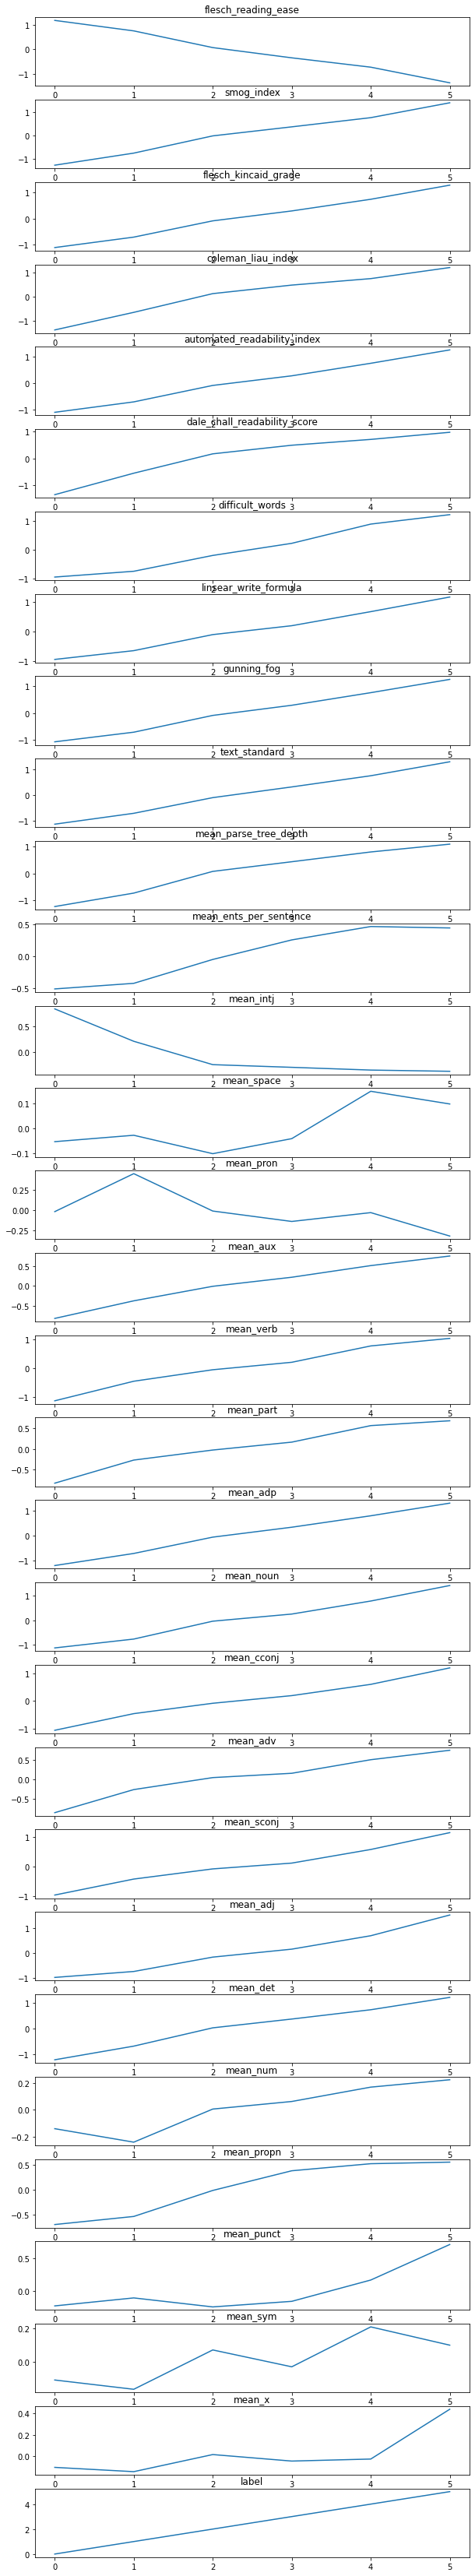

In [50]:
import matplotlib.pyplot as plt

mean_scores = {}
for column in preproc_data.columns:
    mean = preproc_data.groupby("label")[column].mean()
    mean_scores[column] = mean


fig, axs = plt.subplots(len(mean_scores))
fig.set_size_inches((10, 60))
for i, (title, data) in enumerate(mean_scores.items()):
    axs[i].plot(data.index, data.values)
    axs[i].set_title(title)


In [62]:
preproc_data.to_csv("data/CEFR/preprocessed_cefr_leveled_texts.csv", index=False)